In [2]:
## import the ncessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [54]:
## load the dataset
df = pd.read_csv('M1_final.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [55]:
df.shape

(28820, 23)

# Data Preparation

In [56]:
## getting info about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [57]:
df.isna().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [58]:
df["Wind"].value_counts()

Wind
W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: count, dtype: int64

In [21]:
df['Wind'].replace(np.nan, 'W', inplace = True)

In [33]:
df.isna().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

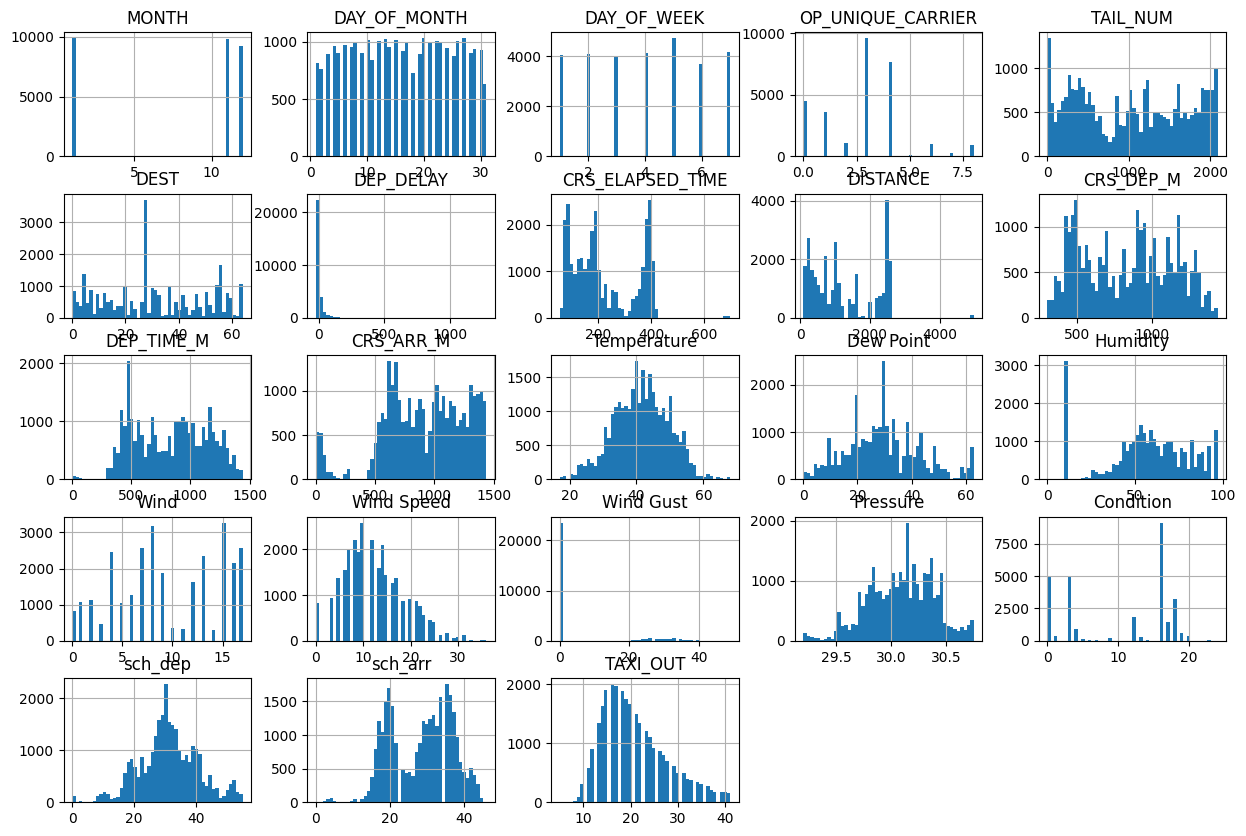

In [36]:
df.hist(bins=50, figsize=(15, 10))
plt.show

In [23]:
# Clean our data by removing duplicate values, and transforming columns into numerical values
label = LabelEncoder()
label.fit(df.OP_UNIQUE_CARRIER.drop_duplicates())
df.OP_UNIQUE_CARRIER = label.transform(df.OP_UNIQUE_CARRIER)

label.fit(df.TAIL_NUM.drop_duplicates())
df.TAIL_NUM = label.transform(df.TAIL_NUM)

label.fit(df.DEST.drop_duplicates())
df.DEST = label.transform(df.DEST)

label.fit(df['Dew Point'].drop_duplicates())
df['Dew Point'] = label.transform(df['Dew Point'])

label.fit(df.Wind.drop_duplicates())
df.Wind = label.transform(df.Wind)

label.fit(df.Condition.drop_duplicates())
df.Condition = label.transform(df.Condition)

# the final cleaned dataset
df


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,...,30,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,...,30,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,...,30,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,...,30,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,...,28,58,15,24,35,29.91,4,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,3,270,38,2,57,150,1370,...,34,96,4,6,0,30.18,0,20,32,19
28816,1,31,5,1,11,4,2,75,187,1390,...,34,96,4,6,0,30.18,0,19,23,22
28817,1,31,5,2,975,55,283,392,2422,1125,...,34,96,4,6,0,30.18,0,19,23,21
28818,1,31,5,3,1935,58,5,224,1598,1417,...,34,96,4,6,0,30.18,0,19,23,13


In [13]:
## Exploratory data analysis
## correlation matrix
corr_mat = df.corr(numeric_only= True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.015554,-0.004192,0.007027,0.046455,-0.016052,-0.000144,0.001824,...,0.035051,0.012515,0.006718,-0.035097,-0.051014,-0.085274,0.045347,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,0.014098,0.000987,0.004874,-0.036618,0.002761,-0.002762,0.001754,...,-0.050977,0.096215,-0.219121,-0.093211,-0.088991,0.016871,0.024828,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,0.008258,-0.001776,0.006176,-0.006203,0.000413,0.002450,0.005411,...,-0.121753,0.001627,0.062506,0.095943,0.127689,0.102289,0.062235,0.024415,0.009621,0.028388
OP_UNIQUE_CARRIER,0.015554,0.014098,0.008258,1.000000,-0.006863,-0.010131,0.006026,0.049573,0.062042,0.010360,...,0.007793,0.000121,0.000387,-0.004643,-0.001205,-0.009238,0.013151,0.050557,0.008899,0.008705
TAIL_NUM,-0.004192,0.000987,-0.001776,-0.006863,1.000000,0.134191,-0.013436,0.086213,0.091885,0.025927,...,-0.000068,0.006892,0.000024,0.002496,0.000326,-0.002889,-0.010735,-0.006647,-0.007899,-0.017930
DEST,0.007027,0.004874,0.006176,-0.010131,0.134191,1.000000,-0.012129,0.355419,0.366584,-0.031534,...,0.000462,0.009410,-0.007761,-0.007573,-0.005510,0.002692,-0.002628,0.060569,-0.050518,0.076594
DEP_DELAY,0.046455,-0.036618,-0.006203,0.006026,-0.013436,-0.012129,1.000000,-0.030871,-0.031507,0.102384,...,-0.000693,-0.011776,0.030247,0.067718,0.044340,-0.064939,-0.000838,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,0.049573,0.086213,0.355419,-0.030871,1.000000,0.994465,-0.031332,...,0.002905,0.017198,-0.004886,-0.013440,-0.011934,0.010165,-0.001969,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,0.062042,0.091885,0.366584,-0.031507,0.994465,1.000000,-0.040963,...,0.005161,0.015110,-0.004480,-0.010734,-0.009522,0.005692,-0.002025,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.010360,0.025927,-0.031534,0.102384,-0.031332,-0.040963,1.000000,...,-0.033321,0.003843,0.024053,0.008063,-0.009887,-0.008285,0.019744,-0.025621,0.495286,0.044864


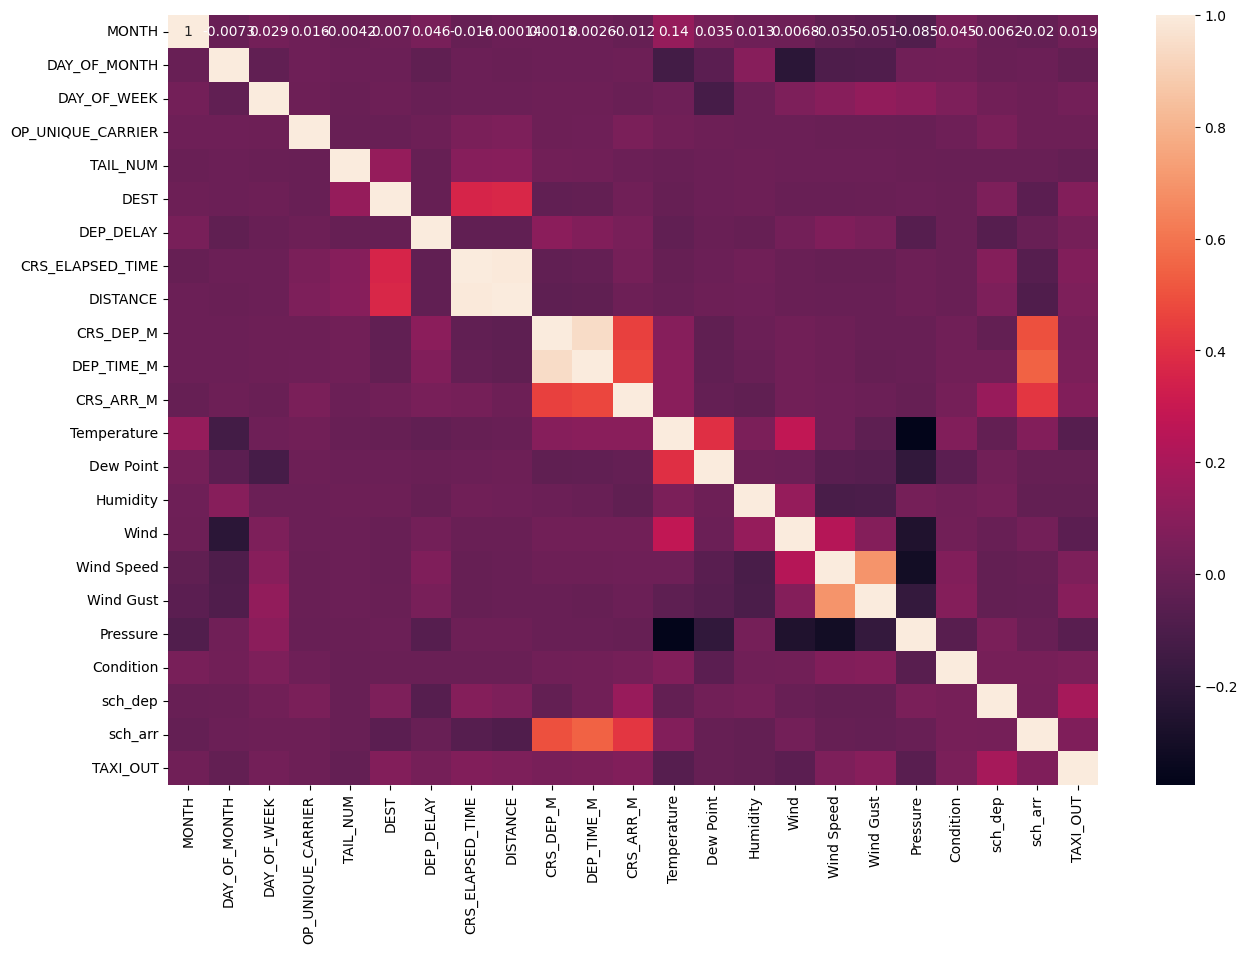

In [37]:
## plot the heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [12]:
# split our cleaned dataset into training and testing sets for various models
X = df.drop(['TAXI_OUT'], axis=1)
y = df[['TAXI_OUT']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=32)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=32)

# 1. Linear Regression Model

In [38]:
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_test

array([[ 6.18583726e-01,  1.48634376e+00,  4.99548923e-01, ...,
         7.67503516e-01,  5.08210798e-01,  1.90122141e-01],
       [-1.38769962e+00, -1.18614092e-03, -3.11768411e-03, ...,
         1.18060695e+00,  7.17826501e-01, -1.38196264e+00],
       [-1.38769962e+00,  3.42089989e-01,  1.50488214e+00, ...,
         1.04290581e+00,  8.22634353e-01, -1.50289224e+00],
       ...,
       [ 8.19212061e-01, -1.25986528e+00, -3.11768411e-03, ...,
         9.05204661e-01, -1.20636310e-01,  3.11051740e-01],
       [ 6.18583726e-01,  6.85366119e-01,  4.99548923e-01, ...,
         3.54400080e-01, -1.27352268e+00, -4.14525851e-01],
       [ 6.18583726e-01, -8.02163778e-01,  1.00221553e+00, ...,
         1.04290581e+00,  9.27442204e-01, -4.14525851e-01]])

In [40]:
## INITIALISE THE LINEAR REGRESSION MODEL
lin_reg = LinearRegression()

In [41]:
## TRAIN OUR LINEAR REGRESSION MODEL
lin_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
## EVALUATE OUR LINEAR REGRESSION MODEL
y_pred = lin_reg.predict(X_test)
y_pred

array([[23.38299933],
       [22.55414033],
       [23.41126896],
       ...,
       [22.53012223],
       [18.80176688],
       [22.09121199]])

In [43]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1
print('Accuracy:', lin_reg.score(X_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Accuracy: 1.0
MAE: 5.2770367847438076
MSE: 44.17958467844589
RMSE: 6.646772500879347
R2: 0.07823935306499419


# 2. Lasso & Ridge Models

In [44]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [45]:
# define models
model_lasso = Lasso(alpha=0.99)
model_ridge = Ridge(alpha=0.99)

In [46]:
X1 = df.iloc[:-1, :-1]# set predicting variables
y1 = df.iloc[:-1, -1] # set variable to predict (score)
X1_test = df.iloc[-1, :-1] # test data

In [47]:
# train models
model_lasso.fit(X1, y1)
model_ridge.fit(X1, y1)

Ridge(alpha=0.99)

In [48]:
# make predictions
prediction_lasso = model_lasso.predict([X1_test])
prediction_ridge = model_ridge.predict([X1_test])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [49]:
# summarize predictions
print('Predicted: %.3f' % prediction_lasso)
print('Predicted: %.3f' % prediction_ridge)

Predicted: 17.414
Predicted: 16.461


/var/folders/gb/pxtz1wgn7ml7360rd4np0dxr0000gn/T/ipykernel_1122/4060707215.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % prediction_lasso)
/var/folders/gb/pxtz1wgn7ml7360rd4np0dxr0000gn/T/ipykernel_1122/4060707215.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % prediction_ridge)
